In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
hotels = pd.read_excel("../Data/HotelCustomersDataset.xlsx")

hotels["date"] =  (pd.to_datetime("2018-12-31")
                   - pd.to_timedelta(hotels["DaysSinceCreation"], unit="D")).astype("datetime64[ns]")

#needed to add "ns" to "datetime64", due to deprication

In [3]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


# Assignment 1: Plotting DataFrames

* Plot the `LodgingRevenue` and `OtherRevenue` columns in a line chart from the `monthly_revenue` DataFrame created below.  
* Make sure your x-axis is the `date` column.

In [4]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()

monthly_revenue.head()

,LodgingRevenue,OtherRevenue
date,,
2016-01-31,124531.34,52190.50
2016-02-29,131689.12,51203.13
2016-03-31,443476.86,127336.11
2016-04-30,500966.80,145228.87
2016-05-31,634200.17,143359.35


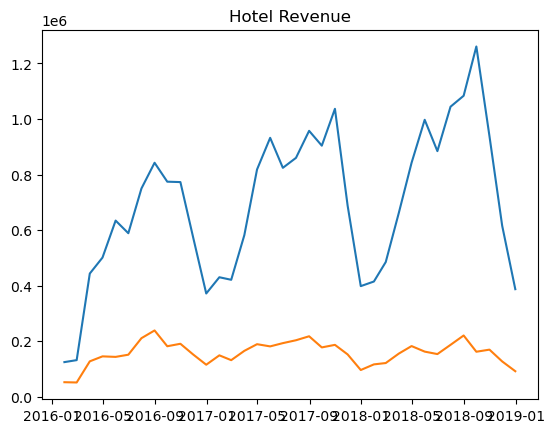

In [5]:
fig, ax = plt.subplots()

ax.plot(monthly_revenue)

ax.set_title("Hotel Revenue");

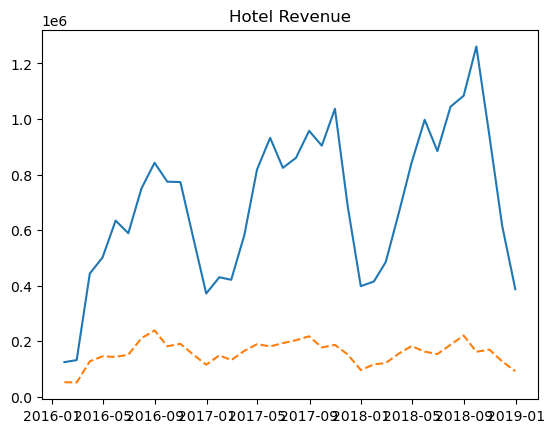

In [6]:
#detailed option
fig, ax = plt.subplots()

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"])
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"], ls="--")

ax.set_title("Hotel Revenue");

# Assignment 2: Formatted Line Chart

Plot the monthly sum of `LodgingRevenue` and `OtherRevenue`.

Make sure to add titles and a y-axis label, remove the top and right borders, and add a legend.

Consider modifying the font sizes as well.

Thanks!

In [7]:
daily_revenue = (
    hotels
    .groupby("date")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
)

monthly_revenue = daily_revenue.resample("M").sum()


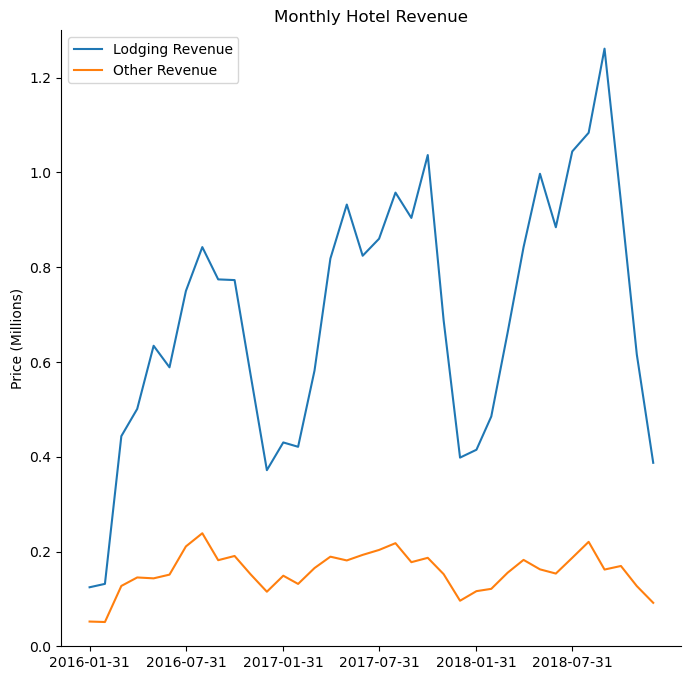

In [8]:
fig, ax = plt.subplots(figsize=(8,8))

ax.plot(monthly_revenue.index, monthly_revenue["LodgingRevenue"]/1000000,
       label= "Lodging Revenue")
ax.plot(monthly_revenue.index, monthly_revenue["OtherRevenue"]/1000000,
       label= "Other Revenue")
ax.set_ylabel("Price (Millions)")
ax.set_ylim(0,1.3)
# to set tick marks every 6 months
ax.set_xticks(monthly_revenue.index[::6])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.legend(loc="upper left")

ax.set_title("Monthly Hotel Revenue")
#plt.xticks(rotation=45)
plt.show();

# Assignment 2: Dual Axis Line Chart

* Plot the sum of nights booked and the sum of cancellations on a quarterly basis (resample("Q") will help). 

* Plot them in the same chart but different Y-Axes.

* Make sure to add titles and axis labels, remove scientific notation, and add a legend.

* Consider modifying the font sizes as well.

Thanks!

*Note: I accidentally repeated the assignment numbers, but leaving as is to align with video numbering*

In [9]:
bookings = (
    hotels
    .groupby("date")
    .agg({"RoomNights":"sum", "BookingsCanceled":"sum"})
)

quarterly_bookings = bookings.resample("Q").sum()

In [10]:
quarterly_bookings.head()

,RoomNights,BookingsCanceled
date,,
2016-03-31,8464,15
2016-06-30,15535,26
2016-09-30,19517,27
2016-12-31,15404,17
2017-03-31,15206,12


Text(0.31, 0.9, 'Nights Booked vs. Cancellations')

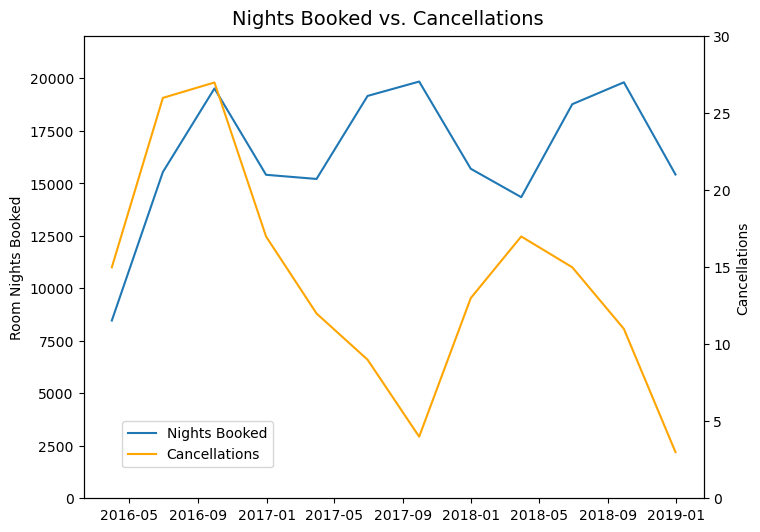

In [11]:
fig,ax=plt.subplots(figsize=(8,6))

ax.plot(quarterly_bookings.index,
        quarterly_bookings["RoomNights"],
        label= "Nights Booked")
ax.set_ylim(0,22000)
ax.set_ylabel("Room Nights Booked")

ax2=ax.twinx()
ax2.plot(quarterly_bookings.index,
        quarterly_bookings["BookingsCanceled"],
        label= "Cancellations",
        c="orange")
ax2.set_ylim(0,30)
ax2.set_ylabel("Cancellations")

fig.legend(bbox_to_anchor=(.37,.25))
fig.text(.31,.9,
        "Nights Booked vs. Cancellations",
        fontsize=14
        )



# Assignment 3: Bar Chart

* Create a bar chart of total room nights booked by country. Limit your results to the top 10 countries.

* Then, build a horizontal bar chart of lodging revenue by country for the same countries in your room nights chart.

* As always, make sure to add labels to your chart!

In [12]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [13]:
countries = (
    hotels
    .groupby("Nationality")
    .agg({"RoomNights":"sum", "LodgingRevenue":"sum"})
    .sort_values("RoomNights", ascending=False)
    .iloc[:10]
)
countries

,RoomNights,LodgingRevenue
Nationality,,
FRA,31018,3809315.59
DEU,26334,3113382.55
PRT,24334,2715008.72
GBR,20822,2693123.61
ESP,10877,1475909.33
ITA,8046,1032729.72
BEL,7758,1047661.98
NLD,6619,904460.78
BRA,6535,787928.01


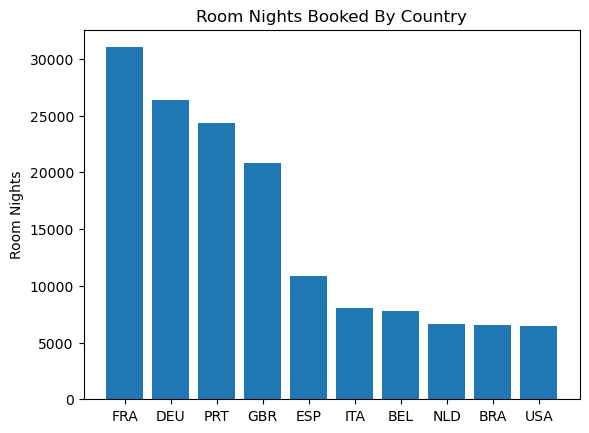

In [14]:
fig,ax=plt.subplots()

ax.bar(countries.index, countries['RoomNights']
      )
ax.set_title("Room Nights Booked By Country", fontsize=12)
ax.set_ylabel("Room Nights");

plt.savefig("bar_chart.png")

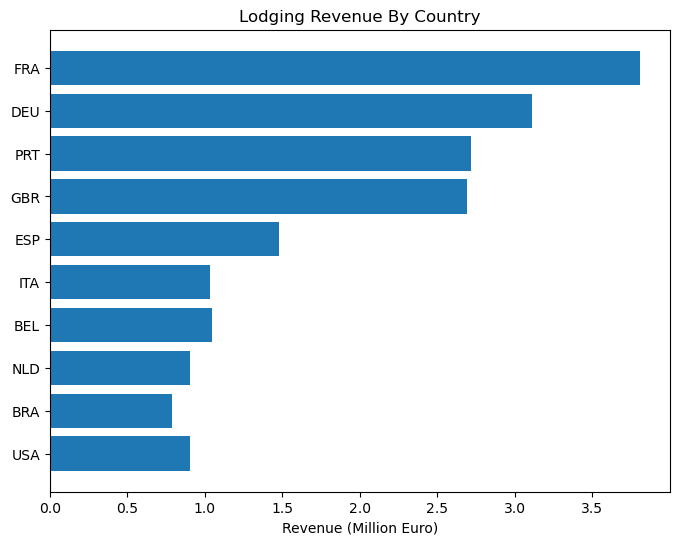

In [15]:
fig,ax=plt.subplots(figsize=(8,6))

ax.barh(countries.index[::-1],countries['LodgingRevenue'][::-1]/1000000
      )
ax.set_title("Lodging Revenue By Country", fontsize=12)
ax.set_xlabel("Revenue (Million Euro)");



# Assignment 4: Advanced Bar Charts

* Build a grouped bar chart of our top 5 countries with LodgingRevenue and OtherRevenue as bars for each.
* Then, build a 100% bar chart stacked bar chart of LodgingRevenue and OtherRevenue. Add a reference line at 80%, which is our baseline. 

Thanks!

In [16]:
countries = ["FRA", "DEU", "PRT", "GBR", "ESP"]

country_subset = (hotels
    .loc[hotels["Nationality"].isin(countries)]
    .groupby("Nationality")
    .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
    .sort_values("LodgingRevenue", ascending=False)
)
# #method without list (I used this first:o)
# country_subset = (
#     hotels
#     .groupby("Nationality")
#     .agg({"LodgingRevenue":"sum", "OtherRevenue":"sum"})
#     .sort_values("LodgingRevenue", ascending=False)
#     .iloc[:5]
# )

country_subset.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,3809315.59,1033166.30
DEU,3113382.55,725541.53
PRT,2715008.72,665634.58
GBR,2693123.61,591212.77
ESP,1475909.33,319840.82


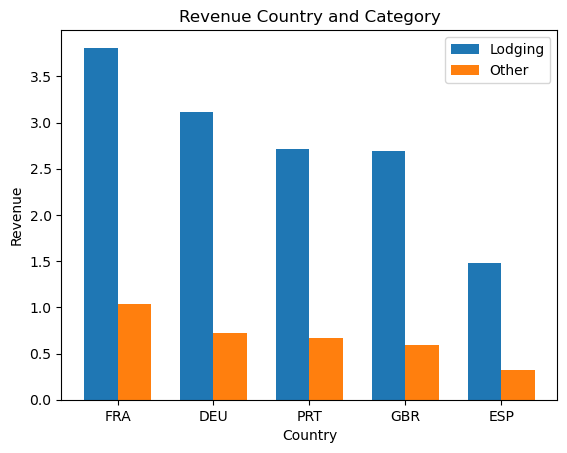

In [17]:
#grouped chart
fig,ax=plt.subplots()

width = .35
x=np.arange(0, len(country_subset))

ax.bar(
    x-width/2,
    country_subset["LodgingRevenue"]/1000000,
    width=width,
    label= "Lodging"
)
ax.bar(
    x+width/2,
    country_subset["OtherRevenue"]/1000000,
    width=width,
    label= "Other"
)
ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenue")
ax.set_xlabel("Country")

ax.set_xticks(x)
ax.set_xticklabels(country_subset.index)

ax.legend()

In [18]:
country_subset2 = country_subset.apply(lambda x: x*100/sum(x),axis=1)
country_subset2.head()

,LodgingRevenue,OtherRevenue
Nationality,,
FRA,78.664529,21.335471
DEU,81.100394,18.899606
PRT,80.310417,19.689583
GBR,81.999019,18.000981
ESP,82.189013,17.810987


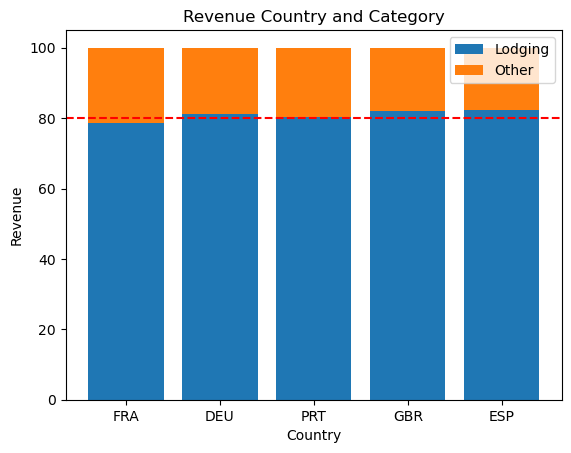

In [19]:
#stacked abr
fig,ax=plt.subplots()

ax.bar(
    country_subset2.index,
    country_subset2["LodgingRevenue"],
    label= "Lodging"
)
ax.bar(
    country_subset2.index,
    country_subset2["OtherRevenue"],
    label= "Other",
    bottom=country_subset2["LodgingRevenue"]
)
# first is what number, second is where it starts, third is where it ends
ax.axhline(80,0,1, color="red", ls="--")
ax.set_title("Revenue Country and Category")
ax.set_ylabel("Revenue")
ax.set_xlabel("Country")

ax.legend()

# Assignment 5: Pie Charts

* Build a pie chart of LodgingRevenue by country. Include a slice for our top 5 countries and combine the rest into an 'other' Category.
* Then, convert the pie chart into a donut chart.

In [20]:
country_rev = (hotels
    .groupby("Nationality")
    .agg({"LodgingRevenue":"sum"})
    .sort_values("LodgingRevenue", ascending=False))

country_rev

,LodgingRevenue
Nationality,
FRA,3809315.59
DEU,3113382.55
PRT,2715008.72
GBR,2693123.61
ESP,1475909.33
...,...
PNG,0.00
FJI,0.00
NRU,0.00


In [21]:
# To get top five and then put all others into "Others"category
pie_data = (pd.concat([country_rev.iloc[:5],#grabbing first 5 of df
                     pd.DataFrame({"LodgingRevenue": country_rev.iloc[5:, 0].sum()},# sum of all others aftter first 5
                                 index=["OTH"])]
                     )).iloc[::-1]

pie_data

,LodgingRevenue
OTH,11170126.66
ESP,1475909.33
GBR,2693123.61
PRT,2715008.72
DEU,3113382.55
FRA,3809315.59


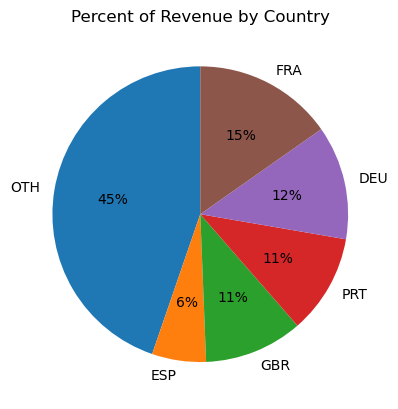

In [22]:
fig,ax=plt.subplots()

ax.pie(pie_data["LodgingRevenue"],
      startangle=90,
      labels=pie_data.index,
      autopct="%.0f%%"
      )
ax.set_title("Percent of Revenue by Country");

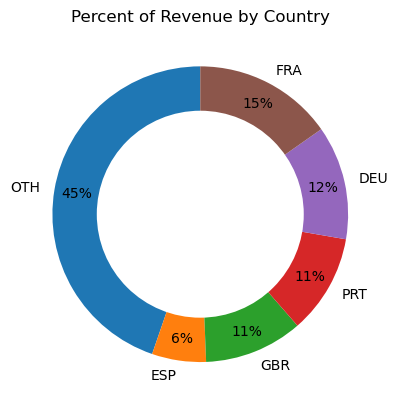

In [23]:
# adding hole to pie to create donut chart
fig,ax=plt.subplots()

ax.pie(pie_data["LodgingRevenue"],
      startangle=90,
      labels= pie_data.index,
      autopct="%.0f%%",
      pctdistance=.85# 
      )
# to create circle
hole= plt.Circle((0,0), 0.7, fc="white")
fig = plt.gcf()
# adding the circle in the pie chart
fig.gca().add_artist(hole)

ax.set_title("Percent of Revenue by Country");

# Assignment 6: Scatterplots & Histograms

* Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
* Then, build a bubble chart by specifying the size of the bubbles as the average nightly revenue.
* Finally, build a histogram comparing customer age in Germany to the Customer age in france. Make sure to tweak your alpha!

Column Creation Code:

<mark style="background-color: black">
    hotels.assign(total_revenue = hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night = lambda x: x["total_revenue"] / x["RoomNights"])</mark>


Thanks!

In [24]:
hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom,date
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,2018-08-03
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,2016-01-01
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016-01-01


In [26]:
hotels.columns

Index(['ID', 'Nationality', 'Age', 'DaysSinceCreation', 'AverageLeadTime',
       'LodgingRevenue', 'OtherRevenue', 'BookingsCanceled',
       'BookingsNoShowed', 'BookingsCheckedIn', 'PersonsNights', 'RoomNights',
       'DaysSinceLastStay', 'DaysSinceFirstStay', 'DistributionChannel',
       'MarketSegment', 'SRHighFloor', 'SRLowFloor', 'SRAccessibleRoom',
       'SRMediumFloor', 'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed',
       'SRTwinBed', 'SRNearElevator', 'SRAwayFromElevator',
       'SRNoAlcoholInMiniBar', 'SRQuietRoom', 'date'],
      dtype='object')

In [27]:
# need to first create a total revenue column and a revenue per night column
hotels = hotels.assign(total_revenue= hotels["LodgingRevenue"] + hotels["OtherRevenue"],
                      revenue_per_night= lambda x: x["total_revenue"]/ x["RoomNights"])

In [28]:
# then groupgby Nationality and aggregate for all charts
# bysuing .agg on Nationality, I can build metrics based on that column
agg_hotels= hotels.groupby("Nationality").agg(total_revenue = ("total_revenue", "sum"),
                                             avg_revenue = ("total_revenue", "mean"),
                                             avg_age = ("Age", "mean"),
                                             avg_nights = ("RoomNights", "mean"),
                                             avg_nightly_revenue = ("revenue_per_night", "mean")
)

Text(0.5, 0, 'Avg Revenue Per Customer')

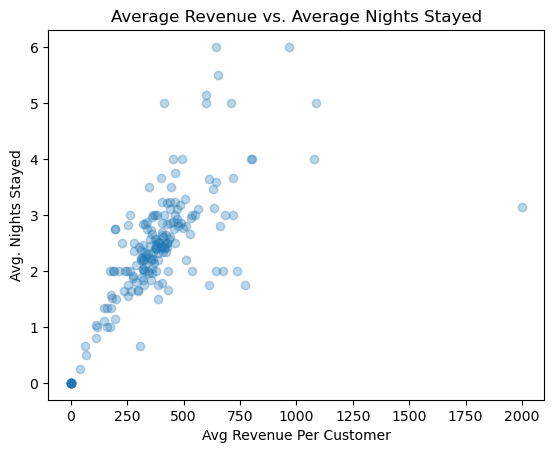

In [30]:
# Build a scatterplot comparing average nights stayed by country to average revenue per customer by country.
fig,ax = plt.subplots()

ax.scatter(agg_hotels["avg_revenue"],
          agg_hotels["avg_nights"],
          #s=agg_hotels["avg_nightly_revenue"],
          alpha=.3
)

ax.set_title("Average Revenue vs. Average Nights Stayed")
ax.set_ylabel("Avg. Nights Stayed")
ax.set_xlabel("Avg Revenue Per Customer")

Text(0.5, 0, 'Avg Revenue Per Customer')

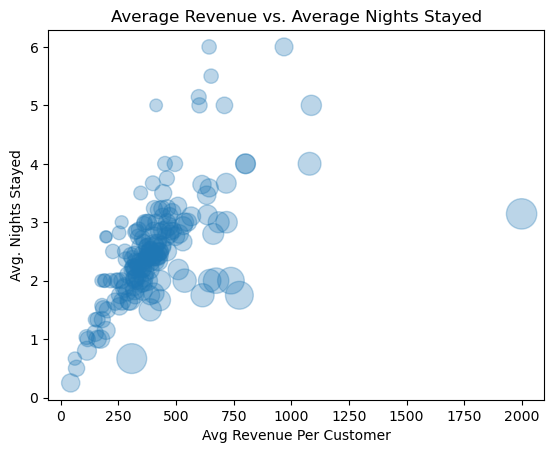

In [32]:
# build a bubble chart by specifying the size of the bubbles as the average nightly revenue
fig,ax = plt.subplots()

ax.scatter(agg_hotels["avg_revenue"],
          agg_hotels["avg_nights"],
          s=agg_hotels["avg_nightly_revenue"],
          alpha=.3
)

ax.set_title("Average Revenue vs. Average Nights Stayed")
ax.set_ylabel("Avg. Nights Stayed")
ax.set_xlabel("Avg Revenue Per Customer")

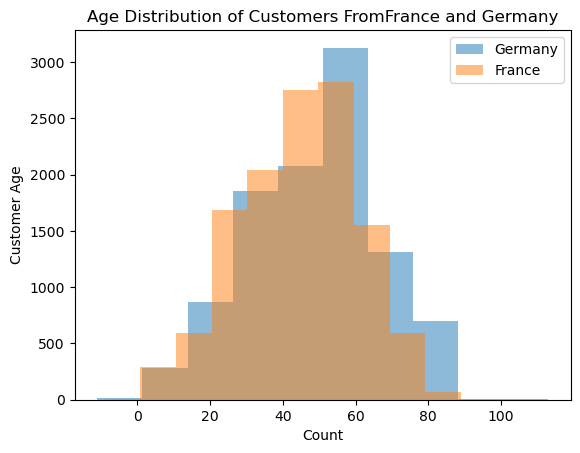

In [33]:
# build a histogram comparing customer age in Germany to the Customer age in france
fig, ax = plt.subplots()

ax.hist(hotels.loc[hotels["Nationality"]== "DEU", "Age"], alpha=.5)
ax.hist(hotels.loc[hotels["Nationality"]== "FRA", "Age"], alpha=.5)

ax.set_title("Age Distribution of Customers FromFrance and Germany")
ax.set_ylabel("Customer Age")
ax.set_xlabel("Count")

ax.legend(["Germany","France"])